In [17]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Number of data entries
data_size = 500

# Generate the data dictionary
data = {
    'Date': pd.date_range('2021-01-01', periods=data_size),
    'Category': [random.choice(categories) for _ in range(data_size)],
    'Likes': np.random.randint(0, 10000, size=data_size)
}

df = pd.DataFrame(data)

df.head(10)

,Date,Category,Likes
0,2021-01-01,Travel,9669
1,2021-01-02,Family,3594
2,2021-01-03,Health,95
3,2021-01-04,Family,3229
4,2021-01-05,Health,2686
5,2021-01-06,Food,2591
6,2021-01-07,Health,7282
7,2021-01-08,Family,4634
8,2021-01-09,Food,3633
9,2021-01-10,Family,8746


### Print the count of each category

In [3]:
df["Category"].value_counts()

Health     77
Food       77
Fashion    66
Music      63
Fitness    60
Travel     59
Family     49
Culture    49
Name: Category, dtype: int64

### Identify duplicated data

In [4]:
duplicates = df[df.duplicated()]
len(duplicates)

0

In [5]:
df["Month"] = df["Date"].dt.month
df["Day_week"] = df["Date"].dt.day_name()
df["Year"] = df["Date"].dt.year

In [6]:
df

,Date,Category,Likes,Month,Day_week,Year
0,2021-01-01,Travel,9669,1,Friday,2021
1,2021-01-02,Family,3594,1,Saturday,2021
2,2021-01-03,Health,95,1,Sunday,2021
3,2021-01-04,Family,3229,1,Monday,2021
4,2021-01-05,Health,2686,1,Tuesday,2021
...,...,...,...,...,...,...
495,2022-05-11,Fashion,8809,5,Wednesday,2022
496,2022-05-12,Food,617,5,Thursday,2022
497,2022-05-13,Health,3905,5,Friday,2022
498,2022-05-14,Food,3880,5,Saturday,2022


In [7]:
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
Month                int64
Day_week            object
Year                 int64
dtype: object

# Visualisations

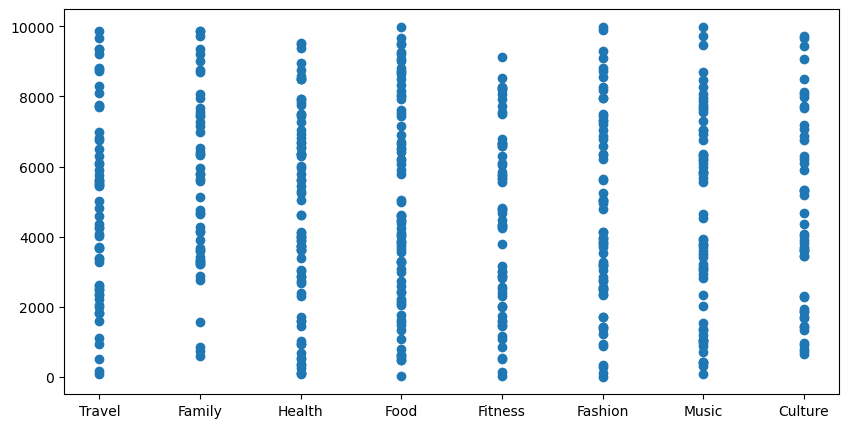

In [8]:
plt.figure(figsize = (10,5))

plt.scatter(df["Category"], df["Likes"])

In [11]:
df.columns

Index(['Date', 'Category', 'Likes', 'Month', 'Day_week', 'Year'], dtype='object')

# Category-Wise Engagement Analysis

Calculate the average and total likes per category to see which categories of posts drive the most engagement. This can help identify popular content types.

Text(0, 0.5, 'Total Likes')

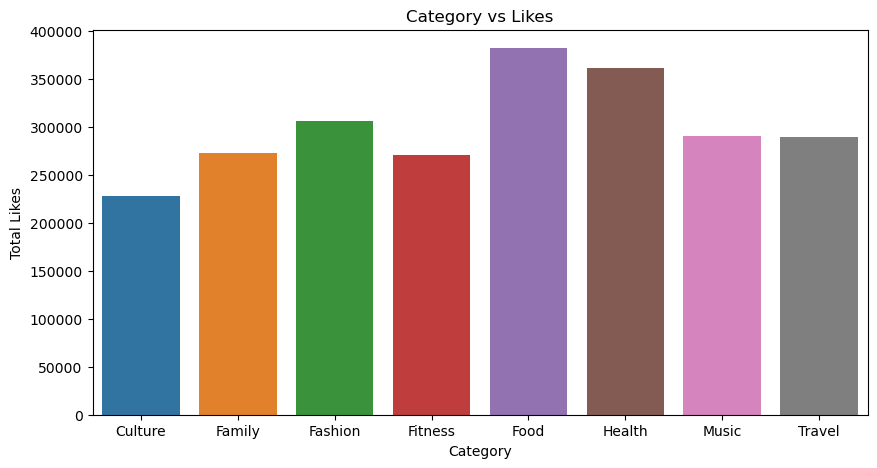

In [35]:
category_likes = df.groupby("Category")["Likes"].sum().reset_index()

plt.figure(figsize = (10,5))
sns.barplot(x = "Category" , y = "Likes", data = category_likes)
plt.title("Category vs Likes")
plt.xlabel("Category")
plt.ylabel("Total Likes")

# Day of the Week Analysis
Analyze engagement (likes) by day of the week to understand which days see higher user interaction. This can inform the best days to post for maximum reach.

([<matplotlib.patches.Wedge at 0x13e3dad90>,
 [Text(0.9917334451782164, 0.47588315132492964, 'Friday'),
  Text(0.2607250160746714, 1.0686545119882582, 'Monday'),
  Text(-0.6436587698901479, 0.892022078170435, 'Saturday'),
  Text(-1.0993523872528213, 0.03774027876848402, 'Sunday'),
  Text(-0.7050218797250082, -0.8443602010451561, 'Thursday'),
  Text(0.21884037824765032, -1.0780115439309663, 'Tuesday'),
  Text(0.9904524706097257, -0.47854352306043235, 'Wednesday')],
 [Text(0.5409455155517543, 0.25957262799541614, '14.2%'),
  Text(0.14221364513163892, 0.5829024610845045, '13.9%'),
  Text(-0.3510866017582625, 0.4865574971838736, '13.6%'),
  Text(-0.599646756683357, 0.02058560660099128, '15.4%'),
  Text(-0.3845573889409135, -0.46056010966099414, '13.5%'),
  Text(0.11936747904417289, -0.5880062966896179, '15.0%'),
  Text(0.5402468021507594, -0.2610237398511449, '14.3%')])

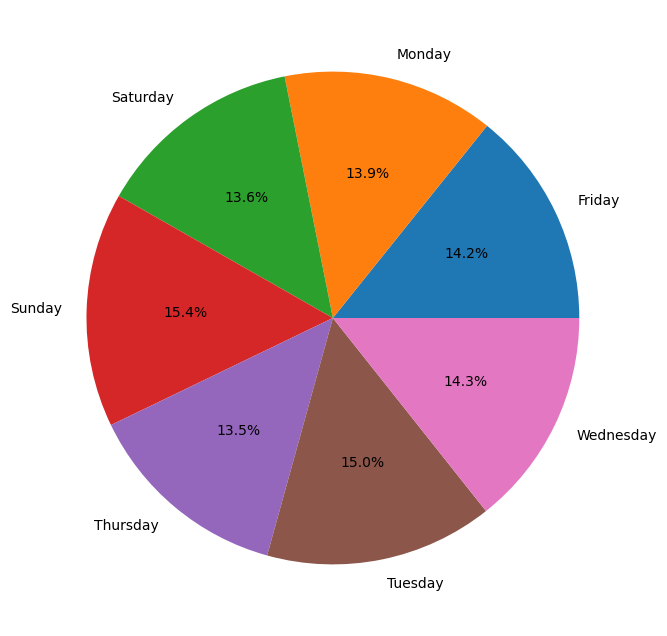

In [51]:
likes_per_day = df.groupby("Day_week")["Likes"].sum().reset_index()

plt.figure(figsize = (8,8))

plt.pie(likes_per_day["Likes"], labels = likes_per_day["Day_week"], autopct = "%1.1f%%")

In [39]:
likes_per_day

,Day_week,Likes
0,Friday,341689
1,Monday,333519
2,Saturday,326613
3,Sunday,369463
4,Thursday,325072
5,Tuesday,359218
6,Wednesday,343739
